In [151]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let's start by reading in one year's worth a data to get a better feel

In [152]:
#df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2015.xls', sheet_name = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'], index_col = 'Date-Fuel')

In [284]:
df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2019.xlsx', sheet_name = None)

In [285]:
df_dec = df['Dec']

In [286]:
df_dec = df_dec[['Date', 'Fuel', 'Total']]

In [287]:
df_dec.head()

,Date,Fuel,Total
0,2019-12-01,Biomass,767.049764
1,2019-12-01,Coal,151811.431053
2,2019-12-01,Gas,40727.079704
3,2019-12-01,Gas-CC,335228.462765
4,2019-12-01,Hydro,960.247287


In [288]:
# https://stackoverflow.com/questions/66792082/pandas-python-how-to-transpose-duplicate-rows-to-columns-and-preserve-order
order = df_dec['Date'].unique()
df_dec = df_dec.set_index([df_dec.groupby('Fuel').cumcount(), 'Fuel'])['Total'].unstack()


In [289]:
# https://datascience.stackexchange.com/questions/48335/how-to-add-date-column-in-python-pandas-dataframe
df_dec['date'] = pd.date_range(start='2019-12-01', periods=len(df_dec), freq='D')

In [290]:
df_dec.head()

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind,date
0,767.049764,151811.431053,40727.079704,335228.462765,960.247287,122044.340561,-31.880903,13623.549285,184276.801609,2019-12-01
1,811.825433,173364.882147,44153.659107,434401.633154,1038.750285,122101.232884,-52.923129,13581.431186,165616.799764,2019-12-02
2,822.102864,173313.361131,42868.937238,400996.234141,1251.110710,122151.612863,-64.110679,13412.485357,197681.121201,2019-12-03
3,846.346163,174090.893562,38003.632336,413297.887209,1134.169289,122168.887311,-65.255246,7163.593238,164910.316023,2019-12-04
4,841.329556,160341.211275,22134.013071,296077.108381,790.327594,122125.557112,-48.017943,8673.856676,289509.678491,2019-12-05


In [291]:
df_dec = df_dec.set_index('date')


In [292]:
df_dec

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind
date,,,,,,,,,
2019-12-01,767.049764,151811.431053,40727.079704,335228.462765,960.247287,122044.340561,-31.880903,13623.549285,184276.801609
2019-12-02,811.825433,173364.882147,44153.659107,434401.633154,1038.750285,122101.232884,-52.923129,13581.431186,165616.799764
2019-12-03,822.102864,173313.361131,42868.937238,400996.234141,1251.110710,122151.612863,-64.110679,13412.485357,197681.121201
2019-12-04,846.346163,174090.893562,38003.632336,413297.887209,1134.169289,122168.887311,-65.255246,7163.593238,164910.316023
2019-12-05,841.329556,160341.211275,22134.013071,296077.108381,790.327594,122125.557112,-48.017943,8673.856676,289509.678491
2019-12-06,862.818079,147285.318872,38211.825358,380414.719535,662.087554,122132.904518,-49.529771,12746.215375,181515.561175
2019-12-07,874.670134,136960.165840,34385.411113,380267.292140,701.085593,122148.406482,-53.693773,12053.468094,186237.829378
2019-12-08,843.822010,126589.533994,7687.031743,259537.181254,666.643463,122115.463811,-64.159210,8412.601541,342685.149589
2019-12-09,791.761408,160301.776183,33560.952609,332355.110200,697.332664,122058.724533,-61.834180,2759.896326,273517.071629


In [112]:
pd.set_option('display.max_columns', None)


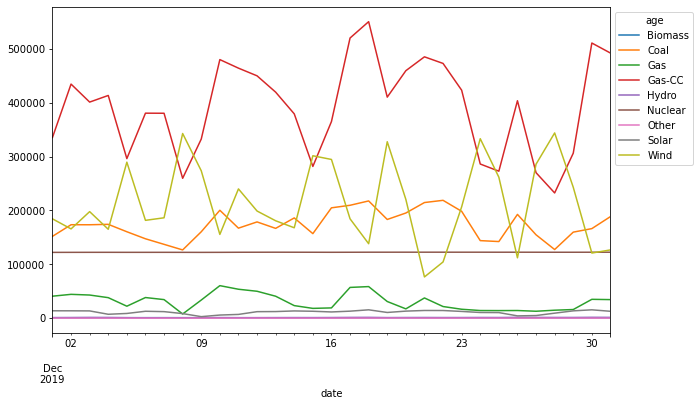

In [269]:
df_dec.plot(figsize=(10,6)).legend(title='age', bbox_to_anchor=(1, 1));


In [276]:
df_dec.drop(columns='date').plot(kind='area', stacked=True)


KeyError: "['date'] not found in axis"

In [104]:
df = pd.concat(df)
df

Total     00:15:00     00:30:00     00:45:00  \
    Date-Fuel                                                                
Dec 12/01/15_Biomass    1379.346921    14.239440    14.288421    14.514236   
    12/01/15_Coal     239627.197886  2282.865809  2319.417685  2267.682240   
    12/01/15_Gas       50966.716103   400.081767   394.293021   394.393169   
    12/01/15_Gas-CC   450916.899571  4065.476972  3944.815169  3881.690189   
    12/01/15_Hydro      2539.899925    22.328659    23.254565    23.451511   
...                             ...          ...          ...          ...   
Jan 01/31/15_Hydro       238.919692     7.839801     7.917297     7.908613   
    01/31/15_Nuclear  122517.221368  1274.082900  1274.176789  1275.602205   
    01/31/15_Other        12.080673     0.280660     0.000000     0.326941   
    01/31/15_Solar       219.069764     0.000000     0.000000     0.000000   
    01/31/15_Wind     111872.187443   896.979008   895.154397   902.354550   

                         01:00:00     01:15:00     01:30:00     01:45:00  \
    Date-Fuel                                                              
Dec 12/01/15_Biomass    14.634674    14.629758    14.625583    14.626262   
    12/01/15_Coal     2236.531719  2209.615375  2159.719585  2117.202034   
    12/01/15_Gas       395.447782   397.113416   391.416349   395.745964   
    12/01/15_Gas-CC   3894.121365  3900.383533  3875.123233  3891.671631   
    12/01/15_Hydro      25.609302    24.880097    23.788010    23.784302   
...                           ...          ...          ...          ...   
Jan 01/31/15_Hydro       7.829391     2.564759     1.579230     1.526668   
    01/31/15_Nuclear  1279.137249  1278.188605  1271.805628  1264.902250   
    01/31/15_Other       0.227970     0.000000     0.000000     0.000000   
    01/31/15_Solar       0.000000     0.000000     0.000000     0.000000   
    01/31/15_Wind      911.544708   917.137936   909.096178   902.090198   

                         02:00:00     02:15:00     02:30:00     02:45:00  \
    Date-Fuel                                                              
Dec 12/01/15_Biomass    14.622499    14.280763    14.128568    13.853635   
    12/01/15_Coal     2116.909071  2100.047857  2103.601349  2073.030054   
    12/01/15_Gas       392.731592   396.040125   393.992000   398.600204   
    12/01/15_Gas-CC   3885.639184  3877.558461  3844.889850  3853.044138   
    12/01/15_Hydro      25.179763    22.070600    21.532277    21.554338   
...                           ...          ...          ...          ...   
Jan 01/31/15_Hydro       1.552613     1.551685     1.548985     1.548060   
    01/31/15_Nuclear  1255.083481  1244.842656  1246.094094  1246.075361   
    01/31/15_Other       0.000000     0.000000     0.000000     0.000000   
    01/31/15_Solar       0.000000     0.000000     0.000000     0.000000   
    01/31/15_Wind      914.185083   922.045526   924.478392   946.447676   

                         03:00:00     03:15:00     03:30:00     03:45:00  \
    Date-Fuel                                                              
Dec 12/01/15_Biomass    13.897564    14.111932    14.198457    14.190220   
    12/01/15_Coal     2076.623177  2101.236604  2123.007942  2139.773339   
    12/01/15_Gas       398.064775   397.864757   412.763995   418.097250   
    12/01/15_Gas-CC   3879.241299  3888.534852  3901.121029  3885.610674   
    12/01/15_Hydro      21.504722    16.836505    16.689369    16.641886   
...                           ...          ...          ...          ...   
Jan 01/31/15_Hydro       1.546396     1.545150     1.545404     1.543059   
    01/31/15_Nuclear  1246.321649  1246.149304  1246.671048  1254.113784   
    01/31/15_Other       0.000000     0.000000     0.000000     0.000000   
    01/31/15_Solar       0.000000     0.000000     0.000000     0.000000   
    01/31/15_Wind      991.484227  1006.875341  1017.422131  1094.800994   

                         04:00:00     04:15:00  

In [105]:
path = '../data/FuelMixReport_PreviousYears'
files = os.listdir(path)
files

['IntGenbyFuel2017.xlsx',
 '.DS_Store',
 'IntGenByFuel2016.xlsx',
 'IntGenbyFuel2020.xlsx',
 'IntGenByFuel2014.xls',
 'IntGenByFuel2015.xls',
 'IntGenByFuel2011.xls',
 'IntGenByFuel2010.xls',
 'IntGenByFuel2012.xls',
 'IntGenByFuel2007.xls',
 'IntGenByFuel2013.xls',
 'IntGenByFuel2009.xls',
 'IntGenByFuel2008.xls',
 'IntGenbyFuel2019.xlsx',
 'IntGenbyFuel2018.xlsx']

In [106]:
files_xls = [f for f in files if f[17:20] == 'xls']
files_xls

['IntGenbyFuel2017.xlsx',
 'IntGenByFuel2016.xlsx',
 'IntGenbyFuel2020.xlsx',
 'IntGenByFuel2014.xls',
 'IntGenByFuel2015.xls',
 'IntGenByFuel2011.xls',
 'IntGenByFuel2010.xls',
 'IntGenByFuel2012.xls',
 'IntGenByFuel2007.xls',
 'IntGenByFuel2013.xls',
 'IntGenByFuel2009.xls',
 'IntGenByFuel2008.xls',
 'IntGenbyFuel2019.xlsx',
 'IntGenbyFuel2018.xlsx']

In [91]:
for f in files_xls:
    pd.read_excel(f, sheet_name=None)
    

FileNotFoundError: [Errno 2] No such file or directory: 'IntGenbyFuel2017.xlsx'